Stock Portfolio Creator

In [48]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Get user input for the stock symbol
symbol1 = input("Enter the stock symbol: ")
print(symbol1)

symbol2= input("Enter the second stock symbol: ")
print(symbol2)

years = 2
print(years)

KO
PEP
2


In [50]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch dividend, sector, and market cap information for the first stock
dividends1 = stock_data1.dividends
sector1 = stock_data1.info.get('sector')
market_cap1 = stock_data1.info.get('marketCap')

# Check if market_cap is not None before performing conversion for the first stock
if market_cap1 is not None:
    market_cap_million1 = f"${market_cap1 / 1e6:.2f}M"
else:
    market_cap_million1 = None

# Get the most recent dividend if available for the first stock
dividend_amount1 = dividends1.tail(1).iloc[0] if not dividends1.empty else None

# Create a DataFrame with the fetched information for the first stock
stock_info_df1 = pd.DataFrame({
    'Stock': [symbol1],
    'Dividend': [dividend_amount1],
    'Sector': [sector1],
    'Market Cap (Million)': [market_cap_million1]
})

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch dividend, sector, and market cap information for the second stock
dividends2 = stock_data2.dividends
sector2 = stock_data2.info.get('sector')
market_cap2 = stock_data2.info.get('marketCap')

# Check if market_cap is not None before performing conversion for the second stock
if market_cap2 is not None:
    market_cap_million2 = f"${market_cap2 / 1e6:.2f}M"
else:
    market_cap_million2 = None

# Get the most recent dividend if available for the second stock
dividend_amount2 = dividends2.tail(1).iloc[0] if not dividends2.empty else None

# Create a DataFrame with the fetched information for the second stock
stock_info_df2 = pd.DataFrame({
    'Stock': [symbol2],
    'Dividend': [dividend_amount2],
    'Sector': [sector2],
    'Market Cap (Million)': [market_cap_million2]
})

# Combine both DataFrames into one
combined_stock_info_df = pd.concat([stock_info_df1, stock_info_df2], ignore_index=True)

# Print the combined stock information table
print(combined_stock_info_df)


  Stock  Dividend              Sector Market Cap (Million)
0    KO     0.485  Consumer Defensive          $274653.99M
1   PEP     1.265  Consumer Defensive          $238278.62M


Percentage change in closing price over the past 2 years for KO: 7.74%

Percentage change in closing price over the past 2 years for PEP: 9.94%


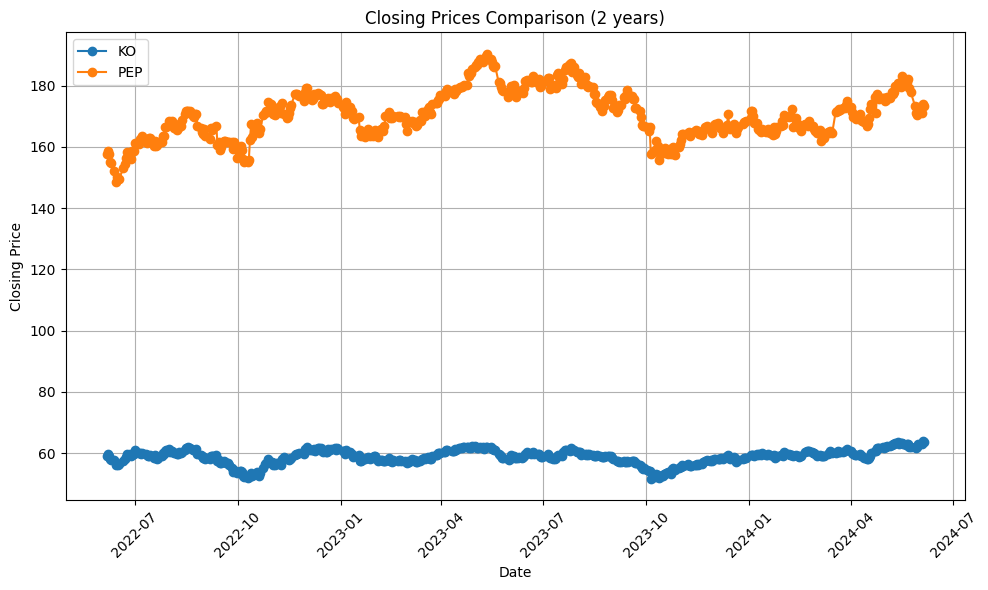

In [51]:

# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch historical data for the first stock
data1 = stock_data1.history(period=f"{years}y")

# Fetch historical data for the first stock
data1 = stock_data1.history(period=f"{years}y")

# Calculate percentage change in closing price over the specified years for the first stock
start_price1 = data1['Close'].iloc[0]
end_price1 = data1['Close'].iloc[-1]
percentage_change1 = ((end_price1 - start_price1) / start_price1) * 100

# Print the percentage change for the first stock
print(f"Percentage change in closing price over the past {years} years for {symbol1}: {percentage_change1:.2f}%")

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch historical data for the second stock
data2 = stock_data2.history(period=f"{years}y")

# Calculate percentage change in closing price over the specified years for the second stock
start_price2 = data2['Close'].iloc[0]
end_price2 = data2['Close'].iloc[-1]
percentage_change2 = ((end_price2 - start_price2) / start_price2) * 100

# Print the percentage change for the second stock
print(f"\nPercentage change in closing price over the past {years} years for {symbol2}: {percentage_change2:.2f}%")

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch historical data for the second stock
data2 = stock_data2.history(period=f"{years}y")

# Plotting closing prices for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Close'], marker='o', linestyle='-', label=symbol1)
plt.plot(data2.index, data2['Close'], marker='o', linestyle='-', label=symbol2)
plt.title(f"Closing Prices Comparison ({years} years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Percentage change in revenue over the past 2 years for KO: 6.39%
Percentage change in revenue over the past 2 years for PEP: 5.88%


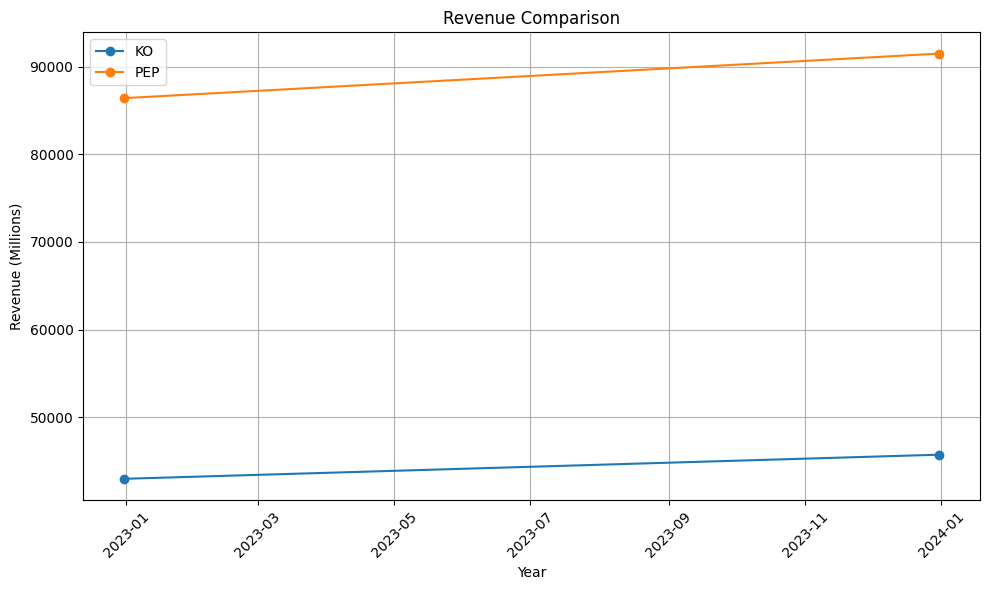

In [52]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch income statement data for the first stock for the past 2 years
income_statement1 = stock_data1.financials.loc['Total Revenue', ['2023-12-31', '2022-12-31']]

# Convert revenue to millions for the first stock
revenue_millions1 = income_statement1 / 1e6

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch income statement data for the second stock for the past 2 years
income_statement2 = stock_data2.financials.loc['Total Revenue', ['2023-12-31', '2022-12-31']]

# Convert revenue to millions for the second stock
revenue_millions2 = income_statement2 / 1e6

# Calculate percentage change in revenue over the past 2 years for the first stock
start_rev1 = revenue_millions1.iloc[-1]  # Revenue 2 years ago
end_rev1 = revenue_millions1.iloc[0]     # Latest revenue
percentage_change1 = ((end_rev1 - start_rev1) / start_rev1) * 100

# Print the percentage change for the first stock
print(f"Percentage change in revenue over the past 2 years for {symbol1}: {percentage_change1:.2f}%")

# Calculate percentage change in revenue over the past 2 years for the second stock
start_rev2 = revenue_millions2.iloc[-1]  # Revenue 2 years ago
end_rev2 = revenue_millions2.iloc[0]     # Latest revenue
percentage_change2 = ((end_rev2 - start_rev2) / start_rev2) * 100

# Print the percentage change for the second stock
print(f"Percentage change in revenue over the past 2 years for {symbol2}: {percentage_change2:.2f}%")

# Plotting income statements for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(revenue_millions1.index, revenue_millions1, marker='o', linestyle='-', label=symbol1)
plt.plot(revenue_millions2.index, revenue_millions2, marker='o', linestyle='-', label=symbol2)
plt.title("Revenue Comparison")
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Percentage change in net income over the past two years for KO: 12.28%
Percentage change in net income over the past two years for PEP: 1.84%


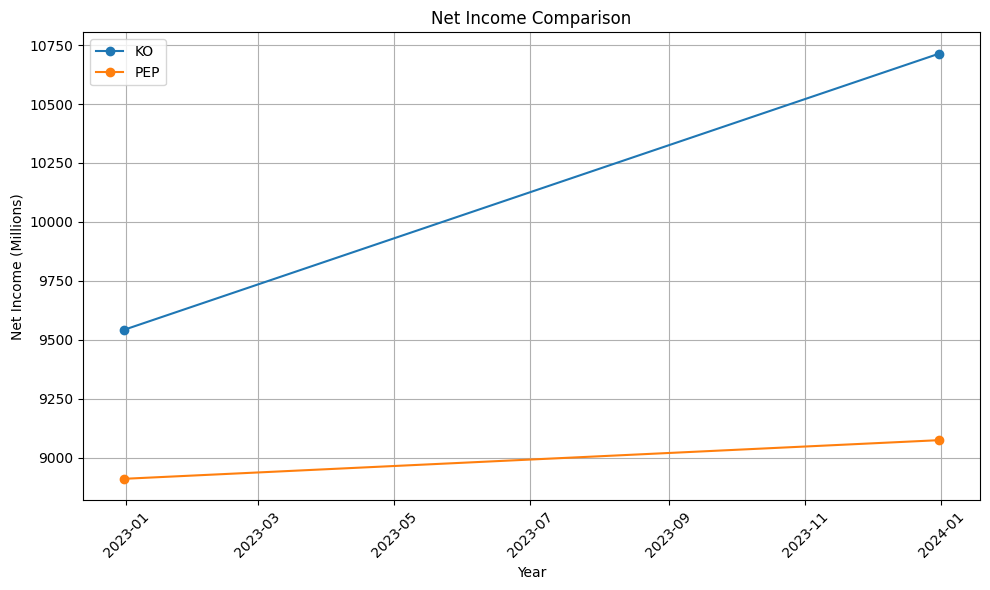

In [53]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch income statement data for the first stock (Net Income) for the past two years
net_income1 = stock_data1.financials.loc['Net Income', ['2023-12-31', '2022-12-31']]

# Convert net income to millions for the first stock
net_income_millions1 = net_income1 / 1e6

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch income statement data for the second stock (Net Income) for the past two years
net_income2 = stock_data2.financials.loc['Net Income', ['2023-12-31', '2022-12-31']]

# Convert net income to millions for the second stock
net_income_millions2 = net_income2 / 1e6

# Calculate percentage change in net income over the past two years for the first stock
start_income1 = net_income_millions1.iloc[-1]  # Net Income two years ago
end_income1 = net_income_millions1.iloc[0]     # Latest net income
percentage_change1 = ((end_income1 - start_income1) / start_income1) * 100

# Print the percentage change for the first stock
print(f"Percentage change in net income over the past two years for {symbol1}: {percentage_change1:.2f}%")

# Calculate percentage change in net income over the past two years for the second stock
start_income2 = net_income_millions2.iloc[-1]  # Net Income two years ago
end_income2 = net_income_millions2.iloc[0]     # Latest net income
percentage_change2 = ((end_income2 - start_income2) / start_income2) * 100

# Print the percentage change for the second stock
print(f"Percentage change in net income over the past two years for {symbol2}: {percentage_change2:.2f}%")

# Plotting net income for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(net_income_millions1.index, net_income_millions1, marker='o', linestyle='-', label=symbol1)
plt.plot(net_income_millions2.index, net_income_millions2, marker='o', linestyle='-', label=symbol2)
plt.title("Net Income Comparison")
plt.xlabel("Year")
plt.ylabel("Net Income (Millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [54]:
stock_data = yf.Ticker(symbol1)

institutional_holders = stock_data.get_institutional_holders()


# Print the stock information table
print(institutional_holders)

# Create a Ticker object for the stock
stock_data = yf.Ticker(symbol2)

institutional_holders2 = stock_data.get_institutional_holders()


# Print the stock information table
print(institutional_holders2)



  Date Reported                                      Holder  pctHeld  \
0    2023-06-30                     Berkshire Hathaway, Inc   0.0925   
1    2023-06-30                          Vanguard Group Inc   0.0855   
2    2023-06-30                              Blackrock Inc.   0.0700   
3    2023-06-30                    State Street Corporation   0.0396   
4    2023-06-30               Geode Capital Management, LLC   0.0183   
5    2023-06-30                   JP Morgan Chase & Company   0.0183   
6    2023-06-30                              Morgan Stanley   0.0182   
7    2023-06-30                                    FMR, LLC   0.0172   
8    2023-06-30  Charles Schwab Investment Management, Inc.   0.0140   
9    2022-12-31           Norges Bank Investment Management   0.0107   

      Shares        Value  
0  400000000  24088000000  
1  369884918  22274469761  
2  302588568  18221883564  
3  171246926  10312489883  
4   79165884   4767369534  
5   78941015   4753827923  
6   7849793

In [67]:
# Compare values:
# stock info
print("Summary of Stock Information:")
print(combined_stock_info_df)

# Calculate percentage change in closing price over the specified years for both stocks
percentage_change_price1 = ((end_price1 - start_price1) / start_price1) * 100
percentage_change_price2 = ((end_price2 - start_price2) / start_price2) * 100



# Calculate percentage change in revenue over the past 2 years for both stocks
percentage_change_rev1 = ((end_rev1 - start_rev1) / start_rev1) * 100
percentage_change_rev2 = ((end_rev2 - start_rev2) / start_rev2) * 100


# Calculate percentage change in net income over the past two years for both stocks
percentage_change_income1 = ((end_income1 - start_income1) / start_income1) * 100
percentage_change_income2 = ((end_income2 - start_income2) / start_income2) * 100


# Combine all the information into a single DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'Stock': [symbol1, symbol2],
    'Revenue (Millions)': [revenue_millions1.iloc[0], revenue_millions2.iloc[0]],
    'Net Income (Millions)': [net_income_millions1.iloc[0], net_income_millions2.iloc[0]],
    'Market Cap (Million)': [market_cap1 / 1e6, market_cap2 / 1e6]
})
# Compare metrics for both stocks
print("\nComparison:")
if percentage_change_price1 > percentage_change_price2:
    print(f"{symbol1} has a higher percentage change in closing price over the past {years} years by {percentage_change_price1 - percentage_change_price2:.2f}%.")
elif percentage_change_price1 < percentage_change_price2:
    print(f"{symbol2} has a higher percentage change in closing price over the past {years} years by {percentage_change_price2 - percentage_change_price1:.2f}%.")
else:
    print("Both stocks have the same percentage change in closing price over the past {years} years.")
    
if percentage_change_rev1 > percentage_change_rev2:
    print(f"{symbol1} has a higher percentage change in revenue over the past 2 years by {percentage_change_rev1 - percentage_change_rev2:.2f}%.")
elif percentage_change_rev1 < percentage_change_rev2:
    print(f"{symbol2} has a higher percentage change in revenue over the past 2 years by {percentage_change_rev2 - percentage_change_rev1:.2f}%.")
else:
    print("Both stocks have the same percentage change in revenue over the past 2 years.")
    
if percentage_change_income1 > percentage_change_income2:
    print(f"{symbol1} has a higher percentage change in net income over the past two years by {percentage_change_income1 - percentage_change_income2:.2f}%.")
elif percentage_change_income1 < percentage_change_income2:
    print(f"{symbol2} has a higher percentage change in net income over the past two years by {percentage_change_income2 - percentage_change_income1:.2f}%.")
else:
    print("Both stocks have the same percentage change in net income over the past two years.")

print("\nComparison Table:")
print(comparison_df)

# Compare metrics for both stocks
print("\nComparison:")
for index, row in comparison_df.iterrows():
    stock = row['Stock']
    revenue = row['Revenue (Millions)']
    net_income = row['Net Income (Millions)']
    market_cap = row['Market Cap (Million)']

# Comparison for Revenue
    if index == 0:
        if revenue > comparison_df.iloc[1]['Revenue (Millions)']:
            print(f"{stock} has higher revenue than {symbol2} by ${revenue - comparison_df.iloc[1]['Revenue (Millions)']:.2f} million.")
        elif revenue < comparison_df.iloc[1]['Revenue (Millions)']:
            print(f"{stock} has lower revenue than {symbol2} by ${comparison_df.iloc[1]['Revenue (Millions)'] - revenue:.2f} million.")
        else:
            print(f"{stock} has the same revenue as {symbol2}.")
    
    # Comparison for Net Income
    if index == 0:
        if net_income > comparison_df.iloc[1]['Net Income (Millions)']:
            print(f"{stock} has higher net income than {symbol2} by ${net_income - comparison_df.iloc[1]['Net Income (Millions)']:.2f} million.")
        elif net_income < comparison_df.iloc[1]['Net Income (Millions)']:
            print(f"{stock} has lower net income than {symbol2} by ${comparison_df.iloc[1]['Net Income (Millions)'] - net_income:.2f} million.")
        else:
            print(f"{stock} has the same net income as {symbol2}.")
    
    # Comparison for Market Cap
    if index == 0:
        if market_cap > comparison_df.iloc[1]['Market Cap (Million)']:
            print(f"{stock} has a higher market cap than {symbol2} by ${market_cap - comparison_df.iloc[1]['Market Cap (Million)']:.2f} million.")
        elif market_cap < comparison_df.iloc[1]['Market Cap (Million)']:
            print(f"{stock} has a lower market cap than {symbol2} by ${comparison_df.iloc[1]['Market Cap (Million)'] - market_cap:.2f} million.")
        else:
            print(f"{stock} has the same market cap as {symbol2}.")




Stock Information:
  Stock  Dividend              Sector Market Cap (Million)
0    KO     0.485  Consumer Defensive          $274653.99M
1   PEP     1.265  Consumer Defensive          $238278.62M

Comparison:
PEP has a higher percentage change in closing price over the past 2 years by 2.20%.
KO has a higher percentage change in revenue over the past 2 years by 0.52%.
KO has a higher percentage change in net income over the past two years by 10.44%.

Comparison Table:
  Stock  Revenue (Millions)  Net Income (Millions)  Market Cap (Million)
0    KO             45754.0                10714.0         274653.986816
1   PEP             91471.0                 9074.0         238278.623232

Comparison:
KO has lower revenue than PEP by $45717.00 million.
KO has higher net income than PEP by $1640.00 million.
KO has a higher market cap than PEP by $36375.36 million.
